In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import cm
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import sys
import os

sys.path.append("../../")
from common.constants import DATAFOLDER

In [4]:
datafile_path = os.path.join(DATAFOLDER.data_root_path, "nexra_data", "2020", "20200101", "00_Time_accumulated_rainfall_(1hour).parquet.gzip")

data = pd.read_parquet(datafile_path)
data *= 3600

data.head()

,0.5625,1.6875,2.8125,3.9375,5.0625,6.1875,7.3125,8.4375,9.5625,10.6875,...,349.3125,350.4375,351.5625,352.6875,353.8125,354.9375,356.0625,357.1875,358.3125,359.4375
-89.4375,0.000040,0.000040,0.000040,0.000040,0.000040,0.000041,0.000041,0.000041,0.000042,0.000042,...,0.000041,0.000041,0.000041,0.000040,0.000040,0.000040,0.000040,0.000040,3.957894e-05,0.000040
-88.3125,0.000003,0.000004,0.000006,0.000008,0.000010,0.000012,0.000014,0.000016,0.000019,0.000021,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.874681e-07,0.000002
-87.1875,0.000040,0.000042,0.000044,0.000045,0.000047,0.000084,0.000175,0.000265,0.000353,0.000439,...,0.000015,0.000018,0.000021,0.000025,0.000027,0.000030,0.000032,0.000034,3.607072e-05,0.000038
-86.0625,0.000843,0.000961,0.001077,0.001192,0.001305,0.001417,0.001533,0.001661,0.001788,0.002002,...,0.000005,0.000006,0.000010,0.000014,0.000103,0.000230,0.000355,0.000479,6.019629e-04,0.000723
-84.9375,0.001098,0.001227,0.001363,0.001499,0.001635,0.001771,0.001907,0.002042,0.002176,0.002310,...,0.000155,0.000240,0.000326,0.000412,0.000499,0.000587,0.000675,0.000763,8.519758e-04,0.000971


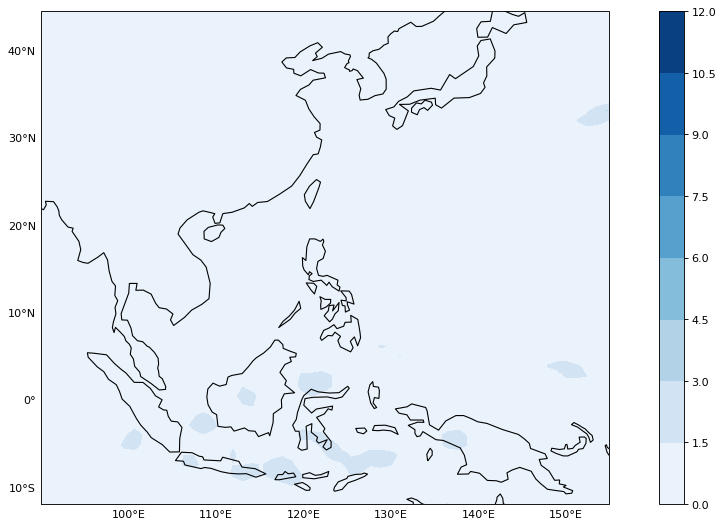

In [5]:
grid_mesh = np.meshgrid(data.columns.astype(np.float32).to_numpy(), data.index.astype(np.float32).to_numpy())
x_grid, y_grid = grid_mesh[0], grid_mesh[1]

plt.figure(figsize=(16, 8), dpi=80)
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([90, 155, -10, 40])
ax.add_feature(cfeature.COASTLINE)
gl = ax.gridlines(draw_labels=True, alpha=0)
gl.right_labels = False
gl.top_labels = False

# clevs = [i for i in range(0, 101, 5)]
cmap = cm.Blues
# norm = mcolors.BoundaryNorm(clevs, cmap.N)
cs = ax.contourf(x_grid, y_grid, data, cmap=cmap)
cbar = plt.colorbar(cs, orientation="vertical")

# Fig Info
cbar.set_label("1 hour cumulative rainfall (mm)")

plt.show()
plt.close()